# Imports

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import gzip
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Experiments description

In [3]:
description = pd.read_csv("/content/drive/My Drive/Data/plateMap.csv")
description

,Exp_ID,Image_Metadata_Site,Cell_Type,Exp_Name
0,1,1,WT,2022-03-11_steady_state_48h_deprived
1,1,2,WT,2022-03-11_steady_state_48h_deprived
2,1,3,WT,2022-03-11_steady_state_48h_deprived
3,1,4,WT,2022-03-11_steady_state_48h_deprived
4,1,5,Akt1_E17K,2022-03-11_steady_state_48h_deprived
...,...,...,...,...
119,6,20,PTEN_del,2022-04-05_steady_state_48h_deprived
120,6,21,PTEN_del,2022-04-05_steady_state_48h_deprived
121,6,22,PTEN_del,2022-04-05_steady_state_48h_deprived
122,6,23,PTEN_del,2022-04-05_steady_state_48h_deprived


*   Altogether 6 experiments were conducted
*   Each of the had 20 fields of view (last had 24)
*   Each of them took 24 hours
*   Acquisitions taken every 5 minuts
*   Amounts to 289 frames in total


# Data Exploration

## Data reading

In [4]:
path = "/content/drive/My Drive/Data/single-cell-tracks_exp1-6_noErbB2.csv.gz" # @param {type:"string"}


def unpack_and_read(f_p):
  with gzip.open(f_p, 'rt') as f:
    df = pd.read_csv(f)
  return df

df = unpack_and_read(path)

## Columns description

In [ ]:
df.head()

,Exp_ID,Image_Metadata_Site,track_id,Image_Metadata_T,Nuclear_size,ERKKTR_ratio,FoxO3A_ratio,objNuclei_Location_Center_X,objNuclei_Location_Center_Y
0,1,1,1,0,303.000,0.704407,1.33383,932.211,875.248
1,1,1,1,1,333.000,0.848242,1.33791,932.150,874.174
2,1,1,1,2,314.000,1.059170,1.37627,932.376,873.787
3,1,1,1,3,322.000,1.188000,1.35754,932.168,873.453
4,1,1,1,4,313.999,1.205540,1.36695,931.146,872.885


In [ ]:
df

,Exp_ID,Image_Metadata_Site,track_id,Image_Metadata_T,Nuclear_size,ERKKTR_ratio,FoxO3A_ratio,objNuclei_Location_Center_X,objNuclei_Location_Center_Y
0,1,1,1,0,303.0000,0.704407,1.33383,932.211,875.248
1,1,1,1,1,333.0000,0.848242,1.33791,932.150,874.174
2,1,1,1,2,314.0000,1.059170,1.37627,932.376,873.787
3,1,1,1,3,322.0000,1.188000,1.35754,932.168,873.453
4,1,1,1,4,313.9990,1.205540,1.36695,931.146,872.885
...,...,...,...,...,...,...,...,...,...
35541643,6,24,1372,253,81.9999,1.287450,1.34448,698.317,223.537
35541644,6,24,1372,254,83.0000,1.265500,1.31116,697.506,224.217
35541645,6,24,1372,255,83.0000,1.263590,1.30931,697.410,223.988
35541646,6,24,1372,256,80.0002,1.249440,1.25123,696.400,224.488


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35541648 entries, 0 to 35541647
Data columns (total 9 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Exp_ID                       int64  
 1   Image_Metadata_Site          int64  
 2   track_id                     int64  
 3   Image_Metadata_T             int64  
 4   Nuclear_size                 float64
 5   ERKKTR_ratio                 float64
 6   FoxO3A_ratio                 float64
 7   objNuclei_Location_Center_X  float64
 8   objNuclei_Location_Center_Y  float64
dtypes: float64(5), int64(4)
memory usage: 2.4 GB


**Exp_ID** - no of experiment

**Image_Metadata_Site** - no of field of view (int64)

**track_id** - no of cell tracked (int64)

**Image_Metadata_T** - no of frame for each cell tracked (int64)

**Nuclear_size** - size of nucleus

**ERKKTR_ratio** - ratio of ERK and KTR markers

**Fox03A_ratio** - ratio of ...

**objNuclei_Location_Center_X** - location of a cell along X axis in pixels (float64)

**objNuclei_Location_Center_Y** - location of a cell along Y axis in pixels (float64)





## NaNs in data

In [ ]:
df.isnull().sum()

,0
Exp_ID,0
Image_Metadata_Site,0
track_id,0
Image_Metadata_T,0
Nuclear_size,0
ERKKTR_ratio,0
FoxO3A_ratio,0
objNuclei_Location_Center_X,0
objNuclei_Location_Center_Y,0


* There are no NaNs in data.

## Number of frames

In [ ]:
df.describe()

,Exp_ID,Image_Metadata_Site,track_id,Image_Metadata_T,Nuclear_size,ERKKTR_ratio,FoxO3A_ratio,objNuclei_Location_Center_X,objNuclei_Location_Center_Y
count,3.554165e+07,3.554165e+07,3.554165e+07,3.554165e+07,3.554165e+07,3.554165e+07,3.554165e+07,3.554165e+07,3.554165e+07
mean,3.593846e+00,9.654818e+00,7.631083e+02,1.283255e+02,3.560427e+02,9.047551e-01,1.291381e+00,5.129958e+02,5.097858e+02
std,1.766744e+00,5.682569e+00,6.784322e+02,7.446081e+01,1.289045e+02,2.278312e-01,2.036630e-01,2.970606e+02,2.972352e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,2.078950e+00,2.119400e+00
25%,2.000000e+00,5.000000e+00,2.870000e+02,6.400000e+01,2.789990e+02,7.534900e-01,1.169790e+00,2.558600e+02,2.520280e+02
50%,4.000000e+00,9.000000e+00,5.940000e+02,1.280000e+02,3.330000e+02,8.670850e-01,1.292390e+00,5.147730e+02,5.084320e+02
75%,5.000000e+00,1.400000e+01,1.024000e+03,1.930000e+02,4.069990e+02,1.025020e+00,1.415030e+00,7.711060e+02,7.672950e+02
max,6.000000e+00,2.400000e+01,6.345000e+03,2.570000e+02,2.308000e+03,6.196320e+00,5.403080e+00,1.020310e+03,1.020930e+03


In [ ]:
# calculate for each Exp_ID and Image_Metadata_Site, how many track_id are there, disclaimer there are many the same track_id distinct
counts = df[df['Image_Metadata_T'] == 0].groupby(['Exp_ID', 'Image_Metadata_Site']).size()

counts.describe()

,0
count,120.000000
mean,1149.508333
std,378.456729
min,485.000000
25%,808.500000
50%,1196.500000
75%,1434.500000
max,2110.000000


Are there 258 entries for each Site and track_id?

In [ ]:
counts = df.groupby(['Exp_ID', 'Image_Metadata_Site', 'track_id']).size()

counts.describe()

,0
count,196909.000000
mean,180.497834
std,100.608202
min,1.000000
25%,65.000000
50%,258.000000
75%,258.000000
max,258.000000


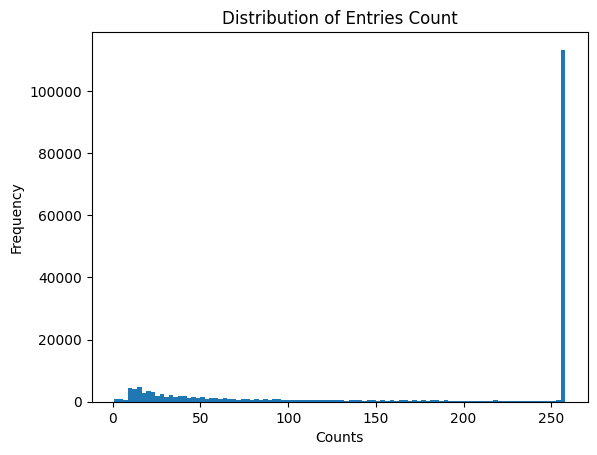

In [ ]:
plt.hist(counts, bins=100)
plt.title("Distribution of Entries Count")
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.show()

In [ ]:

percentage_258 = (counts[counts == 258].count() / counts.count()) * 100
print(f'{percentage_258:.2f}% of counts have the value 258')

56.56% of counts have the value 258


## Single cell simulation

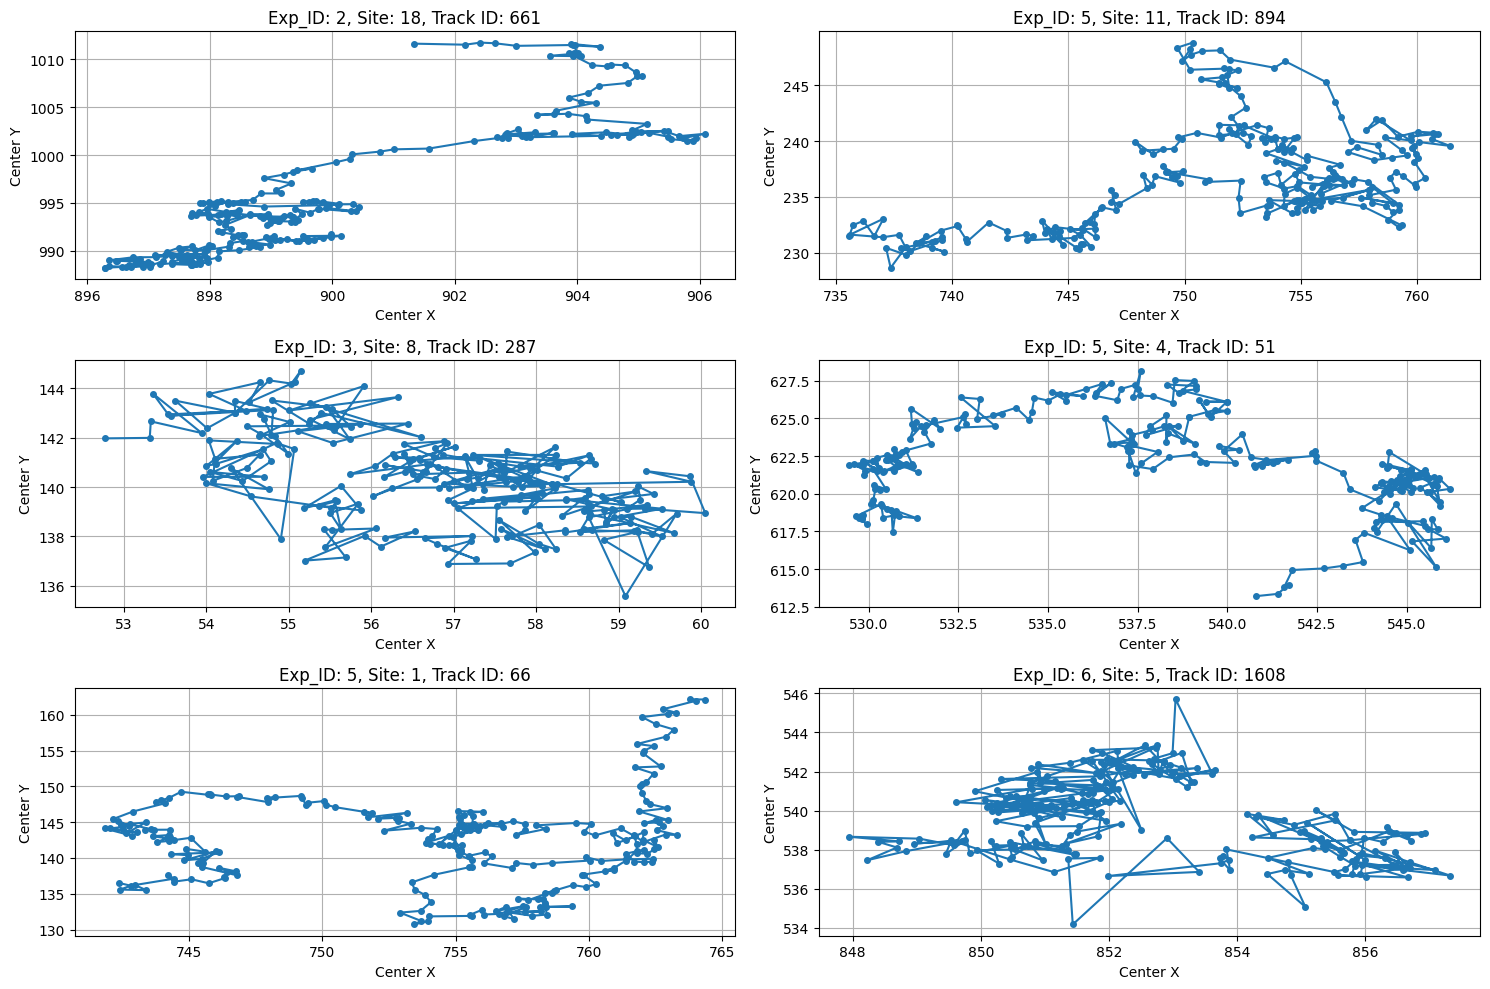

In [ ]:
import matplotlib.pyplot as plt

unique_triplets = df[['Exp_ID', 'Image_Metadata_Site', 'track_id']].drop_duplicates()

sampled_triplets = unique_triplets.sample(n=6, random_state=49)

plt.figure(figsize=(15, 10))

for i, (exp_id, site, track_id) in enumerate(zip(sampled_triplets['Exp_ID'], sampled_triplets['Image_Metadata_Site'], sampled_triplets['track_id']), start=1):
    example = df[(df['Exp_ID'] == exp_id) & (df['Image_Metadata_Site'] == site) & (df['track_id'] == track_id)]
    plt.subplot(3, 2, i)
    plt.plot(example['objNuclei_Location_Center_X'], example['objNuclei_Location_Center_Y'], 'o-', markersize=4)
    plt.xlabel('Center X')
    plt.ylabel('Center Y')
    plt.title(f'Exp_ID: {exp_id}, Site: {site}, Track ID: {track_id}')
    plt.grid(True)

plt.tight_layout()
plt.show()


* Subsequent locations are defnitely correlated
* Unpredictability frame to frame differs

## Simulation of experiment

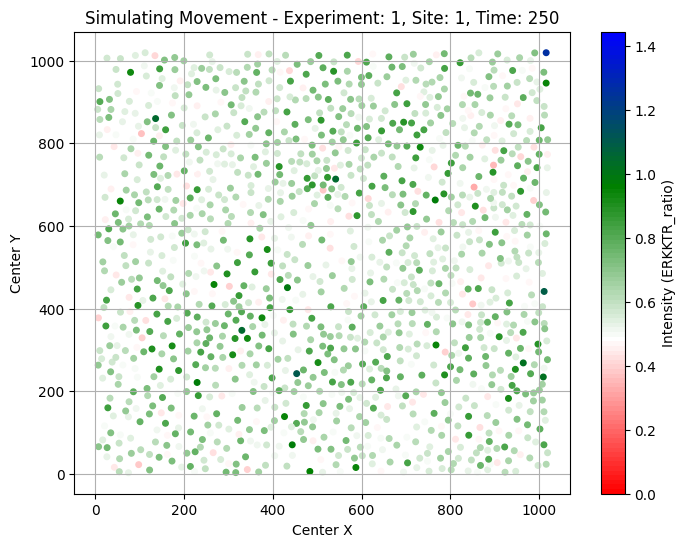

In [ ]:
from IPython.display import clear_output
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

experiment = 1
site = 1

# Define the custom colormap
colors = ["red", "white", "green", "blue"]
# Specify the colors
n_bins = 100
# Number of bins for interpolation
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=n_bins)

marker = 'ERKKTR_ratio'
min_value = np.log1p(df[(df['Exp_ID'] == experiment) & (df['Image_Metadata_Site'] == site)][marker].min())
max_value = np.log1p(df[(df['Exp_ID'] == experiment) & (df['Image_Metadata_Site'] == site)][marker].max())
print(min_value)
print(max_value)

for t in range(258):
    if (t % 10) != 0:
        continue

    clear_output(wait=True)

    current_frame = df[(df['Exp_ID'] == experiment) & (df['Image_Metadata_Site'] == site) & (df['Image_Metadata_T'] == t)]

    plt.figure(figsize=(8, 6))

    sc = plt.scatter(
        current_frame['objNuclei_Location_Center_X'],
        current_frame['objNuclei_Location_Center_Y'],
        s=16,
        c=np.log1p(current_frame[marker]),
        cmap=custom_cmap,
        vmin=min_value,
        vmax=max_value
    )

    plt.xlabel('Center X')
    plt.ylabel('Center Y')
    plt.title(f'Simulating Movement - Experiment: {experiment}, Site: {site}, Time: {t}')
    plt.grid(True)

    plt.colorbar(sc, label=f'Intensity ({marker})')

    plt.show()

    time.sleep(1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import imageio.v2 as imageio
import os

# Variables
experiment = 1
site = 1
marker = 'ERKKTR_ratio'

# Compute min and max values for color scale
min_value = np.log(df[(df['Exp_ID'] == experiment) & (df['Image_Metadata_Site'] == site)][marker].min())
max_value = np.log(df[(df['Exp_ID'] == experiment) & (df['Image_Metadata_Site'] == site)][marker].max())

# Temporary directory for saving frames
os.makedirs("temp_frames", exist_ok=True)
frames = []

for t in range(258):
    if (t % 10) != 0:
        continue

    current_frame = df[(df['Exp_ID'] == experiment) &
                       (df['Image_Metadata_Site'] == site) &
                       (df['Image_Metadata_T'] == t)]

    # Create figure
    plt.figure(figsize=(8, 6))

    sc = plt.scatter(
        current_frame['objNuclei_Location_Center_X'],
        current_frame['objNuclei_Location_Center_Y'],
        s=16,
        c=np.log(current_frame[marker]),
        cmap='RdYlGn',
        vmin=min_value,
        vmax=max_value
    )

    plt.xlabel('Center X')
    plt.ylabel('Center Y')
    plt.title(f'Simulating Movement - Experiment: {experiment}, Site: {site}, Time: {t}')
    plt.grid(True)

    cbar = plt.colorbar(sc, label=f'Intensity ({marker})')

    # Save frame
    filename = f"temp_frames/frame_{t:03d}.png"
    plt.savefig(filename)
    frames.append(filename)
    plt.close()  # Close the figure to save memory

# Create GIF
with imageio.get_writer("simulation.gif", mode='I', duration=1) as writer:
    for frame in frames:
        image = imageio.imread(frame)
        writer.append_data(image)

# Cleanup
for frame in frames:
    os.remove(frame)
os.rmdir("temp_frames")

print("GIF saved as 'simulation.gif'")


<ipython-input-29-3b0171c9002d>:13: RuntimeWarning: divide by zero encountered in log
  min_value = np.log(df[(df['Exp_ID'] == experiment) & (df['Image_Metadata_Site'] == site)][marker].min())


GIF saved as 'simulation.gif'


# Statistics

## Distribution of features

Let's examine the distribution of a random marker.

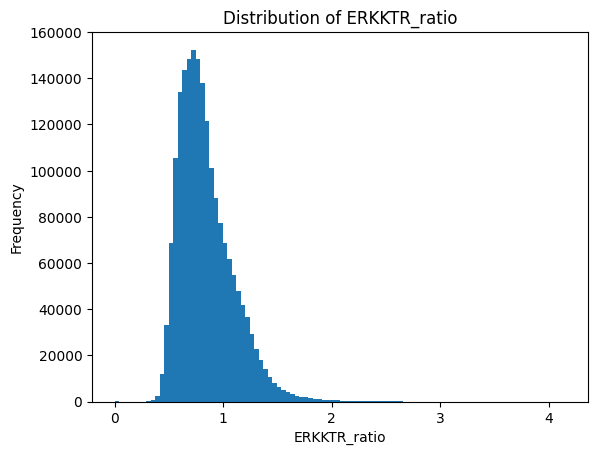

In [ ]:
marker = 'ERKKTR_ratio'
site = 1

plt.hist((df[df['Image_Metadata_Site'] == site][marker]), bins=100)
plt.title(f'Distribution of {marker}')
plt.xlabel(marker)
plt.ylabel('Frequency')
plt.show()

Looking by the shape of the histogram, the distribution resembles log-normal or beta distribution.

## Correlations

Let's measure the correlation between the markers for a given experiment. We need to use Spearman correlation since we know that the distribution isn't normal.

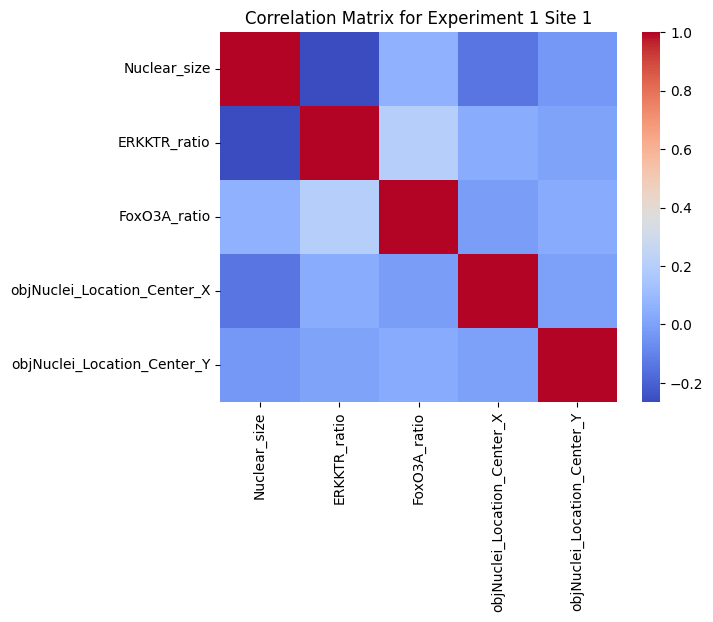

In [ ]:
experiment = 1
site = 1

df_exp = df[df['Exp_ID'] == experiment]
df_site = df_exp[df_exp['Image_Metadata_Site'] == site]

df_site = df_site.drop(['Exp_ID', 'Image_Metadata_Site', 'Image_Metadata_T', 'track_id'], axis=1)

corr_matrix = df_site.corr(method="spearman")

sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title(f'Correlation Matrix for Experiment {experiment} Site {site}')
plt.show()

There is a slight correlation between ERKKTR_ratio and Nuclear_size and between ERKKTR_ratio and FoxO3A_ratio.

Additionally, we can observe that the position of a cell and the markers are uncorrelated.

Let's look at the most correlated (> 0.8) pairs of markers.

In [ ]:
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr = corr_matrix
        current_corr = abs(corr.iloc[i, j])
        current_corr_pair = (corr.columns[i], corr.columns[j])

        if current_corr > 0.2:
            print(f'correlation: {current_corr}')
            print(f'correlation pair: {current_corr_pair}')
            print()


correlation: 0.26453166627495867
correlation pair: ('Nuclear_size', 'ERKKTR_ratio')

correlation: 0.20129724592469783
correlation pair: ('ERKKTR_ratio', 'FoxO3A_ratio')



## Mutation and markers' intensity

In [ ]:
WT = [1, 2, 3, 4]
AKT1_E17K = [5, 6, 7, 8]
PIK3CA_E545K = [9, 10, 11, 12]
PIK3CA_H1047R = [13, 14, 15, 16]
PTEN_del = [17, 18, 19, 20, 21, 22, 23, 24]

mutation_df = pd.DataFrame(columns=['WT', 'AKT1_E17K', 'PIK3CA_E545K', 'PIK3CA_H1047R', 'PTEN_del'])

for mutation, sites in zip(['WT', 'AKT1_E17K', 'PIK3CA_E545K', 'PIK3CA_H1047R', 'PTEN_del'],
 [WT, AKT1_E17K, PIK3CA_E545K, PIK3CA_H1047R, PTEN_del]):
    current_site = df[df['Image_Metadata_Site'].isin(sites)]
    current_site = current_site.drop(['Exp_ID', 'Image_Metadata_Site', 'Image_Metadata_T', 'track_id',
                                          'objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y'], axis=1)

    mutation_df[mutation] = current_site.mean()

mutation_df

,WT,AKT1_E17K,PIK3CA_E545K,PIK3CA_H1047R,PTEN_del
Nuclear_size,342.818248,288.473969,337.158347,511.552655,379.136009
ERKKTR_ratio,0.849849,0.838561,0.923678,1.056930,0.930009
FoxO3A_ratio,1.281352,1.363543,1.247696,1.284009,1.264893


We clearly see that there are significant differences between mutations and intensity of markers. Let's plot the bar charts to visualize the differences.

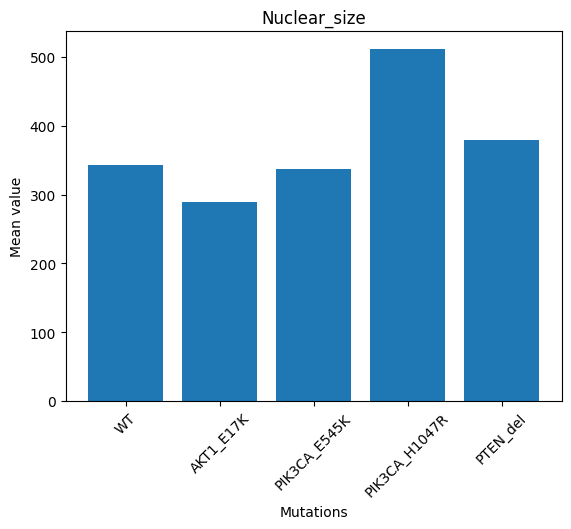

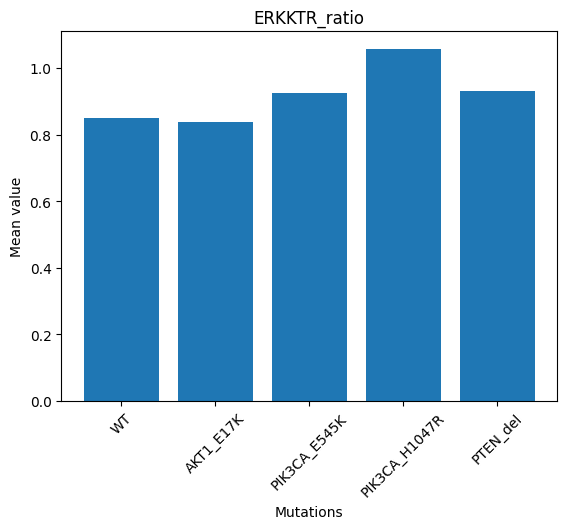

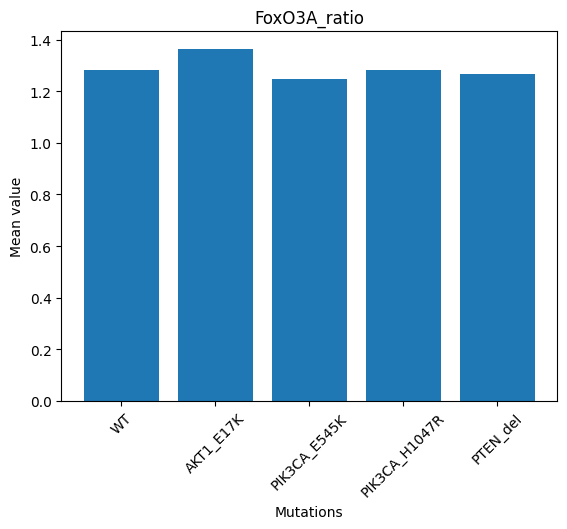

In [ ]:
for i in range(len(mutation_df.index)):
    plt.bar(mutation_df.columns, mutation_df.iloc[i])
    plt.title(mutation_df.index[i])
    plt.xlabel('Mutations')
    plt.ylabel('Mean value')
    plt.xticks(rotation=45)
    plt.show()

## Mutations and motility

Let's do the same for the cells motility. We have to define a measure of motality.

In [ ]:

experiments = [1, 2, 3, 4, 5, 6]
df_exp = df[df['Exp_ID'] == experiment]

df_mot = df_exp.dropna(subset=['objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y'])

df_sort = df_mot.sort_values(by=['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T']).reset_index(drop=True)

df_sort['next_X'] = df_sort.groupby(['Exp_ID', 'Image_Metadata_Site', 'track_id'])['objNuclei_Location_Center_X'].shift(-1)
df_sort['next_Y'] = df_sort.groupby(['Exp_ID', 'Image_Metadata_Site', 'track_id'])['objNuclei_Location_Center_Y'].shift(-1)

df_sort['distance'] = np.sqrt((df_sort['objNuclei_Location_Center_X'] - df_sort['next_X']) ** 2 +
                              (df_sort['objNuclei_Location_Center_Y'] - df_sort['next_Y']) ** 2)

df_sort = df_sort.drop(columns=['next_X', 'next_Y']).dropna(subset=['distance'])

mutation_df = pd.DataFrame(columns=['WT', 'AKT1_E17K', 'PIK3CA_E545K', 'PIK3CA_H1047R', 'PTEN_del'])

means = []
for mutation, sites in zip(['WT', 'AKT1_E17K', 'PIK3CA_E545K', 'PIK3CA_H1047R', 'PTEN_del'],
                           [WT, AKT1_E17K, PIK3CA_E545K, PIK3CA_H1047R, PTEN_del]):
    current_site = df_sort[(df_sort['Image_Metadata_Site'].isin(sites))]
    mean_distance = current_site.groupby('Exp_ID')['distance'].mean().mean()
    means.append(mean_distance)

mutation_df.loc['motility'] = means

mutation_df


,WT,AKT1_E17K,PIK3CA_E545K,PIK3CA_H1047R,PTEN_del
motility,0.447478,0.341145,0.793161,0.910001,0.55252


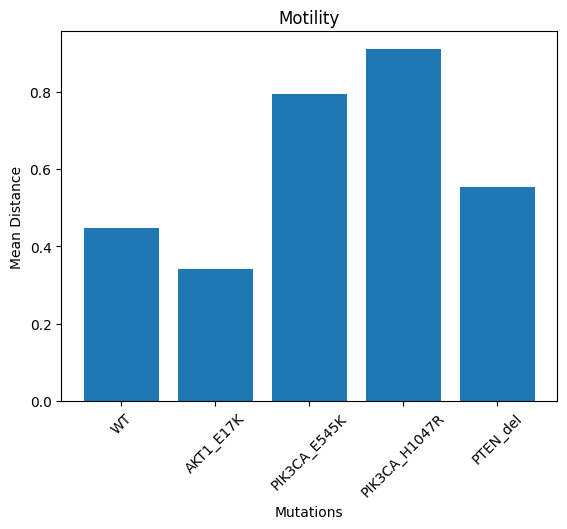

In [ ]:
plt.bar(mutation_df.columns, mutation_df.iloc[0])
plt.title('Motility')
plt.xlabel('Mutations')
plt.ylabel('Mean Distance')
plt.xticks(rotation=45)
plt.show()

Clearly, we can see that PIK3CA_H1047R and PIK3CA_E545K are more motile. The motility of the rest of cells is more or less the same.

## Motility and ERKKTR_ratio relationship

In [ ]:
experiments = [1, 2, 3, 4, 5, 6]
df_exp = df[df['Exp_ID'] == experiment]

df_mot = df_exp.dropna(subset=['objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y'])

df_sort = df_mot.sort_values(by=['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T']).reset_index(drop=True)

df_sort['next_X'] = df_sort.groupby(['Exp_ID', 'Image_Metadata_Site', 'track_id'])['objNuclei_Location_Center_X'].shift(-1)
df_sort['next_Y'] = df_sort.groupby(['Exp_ID', 'Image_Metadata_Site', 'track_id'])['objNuclei_Location_Center_Y'].shift(-1)

df_sort['distance'] = np.sqrt((df_sort['objNuclei_Location_Center_X'] - df_sort['next_X']) ** 2 +
                              (df_sort['objNuclei_Location_Center_Y'] - df_sort['next_Y']) ** 2)

# correlation between 'distance' and 'ERKKTR_ratio'
correlation = df_sort[['distance', 'ERKKTR_ratio']].corr(method='spearman')

correlation

,distance,ERKKTR_ratio
distance,1.00000,0.16146
ERKKTR_ratio,0.16146,1.00000


# Distribution

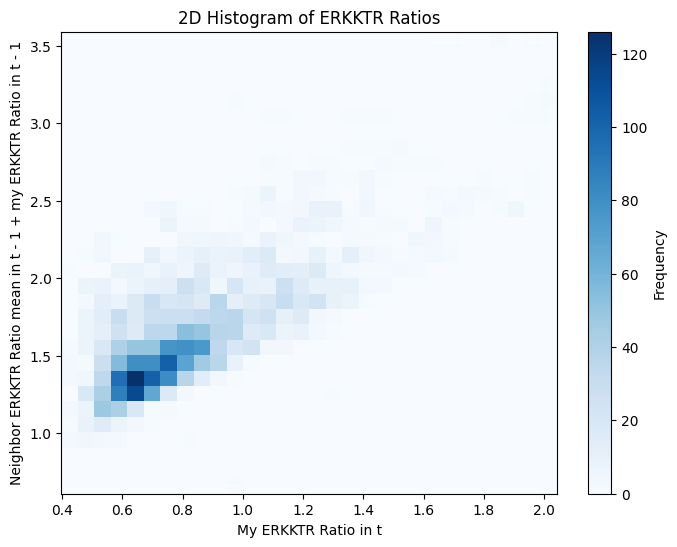

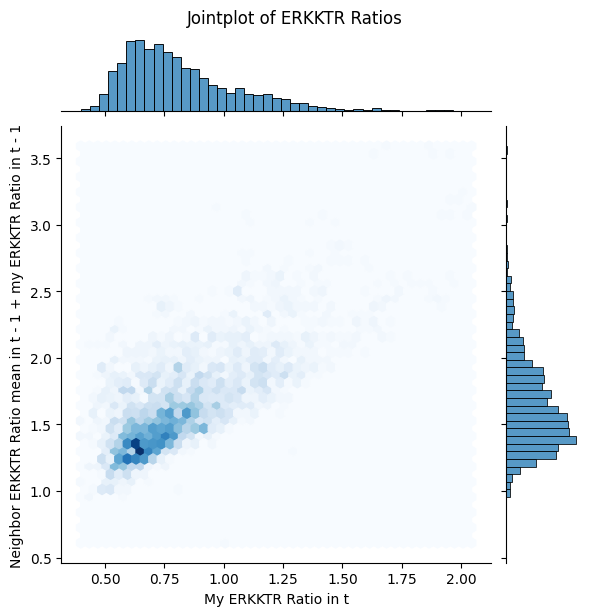

In [ ]:
from scipy.spatial import Voronoi

df_WT = df[df['Image_Metadata_Site'] <= 4]
df_WT_Field = df_WT[(df_WT['Image_Metadata_Site'] == 1) & (df_WT['Exp_ID'] == 1)]

ERKs = []
for i in range(1, 4):
    points = df_WT_Field[df_WT_Field['Image_Metadata_T'] == i][['objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y']].values
    vor = Voronoi(points)

    neighbors = {i: set() for i in range(1, len(points) + 1)}
    for p1, p2 in vor.ridge_points:
        neighbors[p1 + 1].add(p2 + 1)
        neighbors[p2 + 1].add(p1 + 1)


    for cell in range(1, len(points) + 1):
        my_erk = df_WT_Field[(df_WT_Field['Image_Metadata_T'] == i) & (df_WT_Field['track_id'] == cell)]['ERKKTR_ratio'].values
        if len(my_erk) == 0:
            continue

        neighbor_erk = []

        cell_erk_t_minus_1 = df_WT_Field[
            (df_WT_Field['Image_Metadata_T'] == i - 1) &
            (df_WT_Field['track_id'] == cell)
        ]['ERKKTR_ratio'].values


        for neighbor in neighbors[cell]:
            neighbor_erk_values = df_WT_Field[
                (df_WT_Field['Image_Metadata_T'] == i - 1) &
                (df_WT_Field['track_id'] == neighbor)
            ]['ERKKTR_ratio'].values

        if len(neighbor_erk_values) > 0:
            neighbor_erk.extend(neighbor_erk_values)

        if neighbor_erk:
            neighbor_erk_mean = np.mean(neighbor_erk)
        else:
            continue
        if len(cell_erk_t_minus_1) > 0:
                # add your value
                neighbor_erk_mean += cell_erk_t_minus_1[0]
        ERKs.append([my_erk[0], neighbor_erk_mean])

df_ERK = pd.DataFrame(ERKs, columns=['My ERKKTR Ratio in t', 'Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1'])

df_ERK = df_ERK.dropna(subset=['My ERKKTR Ratio in t', 'Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1'])

# Plot using matplotlib (2D histogram)
plt.figure(figsize=(8, 6))
plt.hist2d(df_ERK['My ERKKTR Ratio in t'], df_ERK['Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1'], bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('My ERKKTR Ratio in t')
plt.ylabel('Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1')
plt.title('2D Histogram of ERKKTR Ratios')
plt.show()

# Plot using seaborn (Jointplot)
sns.jointplot(x='My ERKKTR Ratio in t', y='Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1', data=df_ERK, kind='hex', cmap='Blues')
plt.suptitle('Jointplot of ERKKTR Ratios', y=1.02)
plt.show()





In [ ]:
# check correlation
correlation = df_ERK[['My ERKKTR Ratio in t', 'Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1']].corr(method='spearman')
correlation

,My ERKKTR Ratio in t,Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1
My ERKKTR Ratio in t,1.000000,0.669675
Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1,0.669675,1.000000


In [ ]:
!pip install copulas

## Gamma distribution

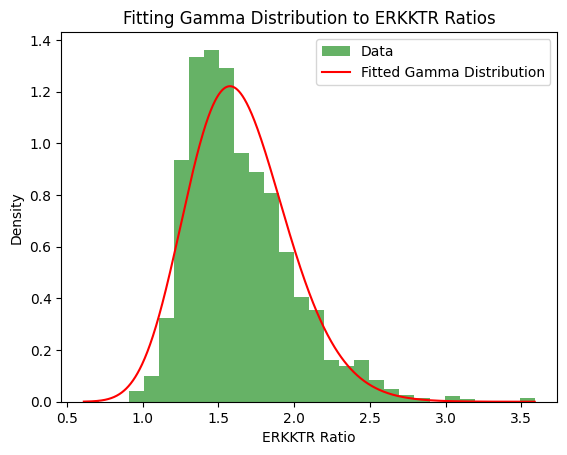

Fitted Gamma Distribution Parameters: shape=24.41, loc=0.00, scale=0.07


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma

#Rename df_ERK columns
df_ERK = df_ERK.rename(columns={'My ERKKTR Ratio in t': 'my_erk', 'Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1': 'neighbor_erk'})
# Assuming df_ERK contains your ERK ratio data
data = df_ERK['neighbor_erk']

# Step 1: Fit the Gamma distribution to your data
shape, loc, scale = gamma.fit(data, floc=0)  # Fix location to 0 if the data is strictly positive

# Step 2: Create the fitted Gamma distribution
gamma_dist = gamma(shape, loc, scale)

# Step 3: Plot the histogram of your data and the fitted Gamma distribution
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data')

# Plot the fitted Gamma distribution's probability density function (PDF)
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, gamma_dist.pdf(x), 'r-', label='Fitted Gamma Distribution')

# Labels and title
plt.xlabel('ERKKTR Ratio')
plt.ylabel('Density')
plt.title('Fitting Gamma Distribution to ERKKTR Ratios')
plt.legend()
plt.show()

# Step 4: Print the fitted parameters
print(f"Fitted Gamma Distribution Parameters: shape={shape:.2f}, loc={loc:.2f}, scale={scale:.2f}")


In [ ]:
df_ERK.describe()

,my_erk,neighbor_erk
count,3786.000000,3786.000000
mean,0.823146,1.642919
std,0.250270,0.347492
min,0.397580,0.610403
25%,0.641044,1.389541
50%,0.764638,1.574576
75%,0.941138,1.837344
max,2.043910,3.589370


## Sampling ERK

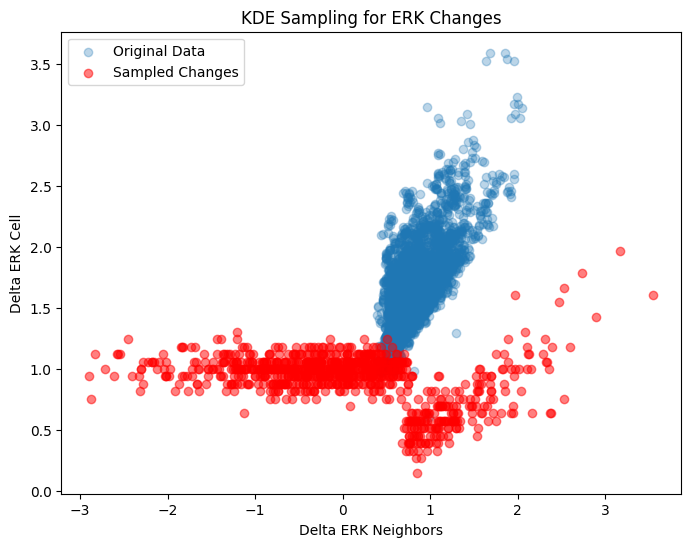

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
# Assume you have a DataFrame `df` with columns:
# - 'delta_erk_cell': Individual cell changes
# - 'delta_erk_neighbors': Average neighbor changes
# Example DataFrame (replace with your real data)

# Prepare data for KDE
X = df_ERK[['my_erk', 'neighbor_erk']].values
# Fit a 2D kernel density model
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)  # Adjust bandwidth as needed
kde.fit(X)
# Sampling function
def sample_erk_changes(neighbor_avg_changes, kde_model, n_samples=1):
    """
    Sample changes in ERK levels given neighbors' average changes.
    :param neighbor_avg_changes: List or array of neighbor changes for each cell.
    :param kde_model: Fitted kernel density estimation model.
    :param n_samples: Number of samples per cell.
    :return: Sampled ERK changes for each cell.
    """
    sampled_changes = []
    for neighbor_change in neighbor_avg_changes:
        # Generate points around the given neighbor change to sample from conditional distribution
        grid = np.column_stack((
            np.linspace(-3, 3, 100),  # Range of possible cell changes (adjust as needed)
            np.full(100, neighbor_change)
        ))
        # Calculate probabilities using the KDE model
        log_probs = kde_model.score_samples(grid)
        probs = np.exp(log_probs)
        # Normalize probabilities
        probs /= probs.sum()
        # Sample from the grid using probabilities
        sampled_change = np.random.choice(grid[:, 0], size=n_samples, p=probs)
        sampled_changes.append(sampled_change[0])  # Take the first sample (or more if needed)
    return np.array(sampled_changes)
# Example usage
current_neighbor_changes = np.random.normal(0, 1, 900)  # Replace with real neighbor averages
sampled_erk_changes = sample_erk_changes(current_neighbor_changes, kde_model=kde)
# Plot the original data and sampled data
plt.figure(figsize=(8, 6))
plt.scatter(df_ERK['my_erk'], df_ERK['neighbor_erk'], alpha=0.3, label="Original Data")
plt.scatter(current_neighbor_changes, sampled_erk_changes, color='red', alpha=0.5, label="Sampled Changes")
plt.xlabel("Delta ERK Neighbors")
plt.ylabel("Delta ERK Cell")
plt.legend()
plt.title("KDE Sampling for ERK Changes")
plt.show()

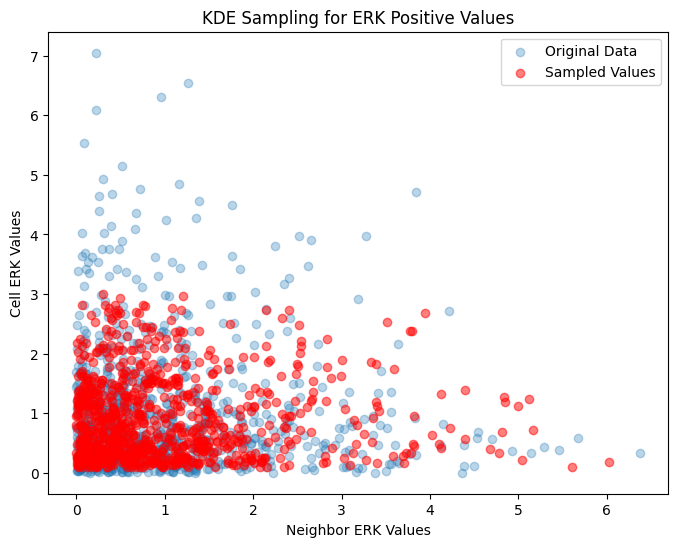

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Example DataFrame with positive values for 'my_erk' and 'neighbor_erk' (replace with real data)
df_ERK = pd.DataFrame({
    'my_erk': np.random.exponential(scale=1.0, size=900),  # Example: Exponentially distributed positive values
    'neighbor_erk': np.random.exponential(scale=1.0, size=900)
})

# Prepare data for KDE
X = df_ERK[['my_erk', 'neighbor_erk']].values

# Fit a 2D kernel density model
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)  # Adjust bandwidth as needed
kde.fit(X)

# Sampling function
def sample_erk_values(neighbor_values, kde_model, n_samples=1):
    """
    Sample ERK values given neighbors' values.
    :param neighbor_values: List or array of neighbor values for each cell.
    :param kde_model: Fitted kernel density estimation model.
    :param n_samples: Number of samples per cell.
    :return: Sampled ERK values for each cell.
    """
    sampled_values = []
    for neighbor_value in neighbor_values:
        # Generate points around the given neighbor value to sample from the conditional distribution
        grid = np.column_stack((
            np.linspace(0.1, 3, 100),  # Range of possible cell values (adjust as needed, ensure > 0)
            np.full(100, neighbor_value)
        ))
        # Calculate probabilities using the KDE model
        log_probs = kde_model.score_samples(grid)
        probs = np.exp(log_probs)
        # Normalize probabilities
        probs /= probs.sum()
        # Sample from the grid using probabilities
        sampled_value = np.random.choice(grid[:, 0], size=n_samples, p=probs)
        sampled_values.append(sampled_value[0])  # Take the first sample (or more if needed)
    return np.array(sampled_values)

# Example usage
current_neighbor_values = np.random.exponential(scale=1.0, size=900)  # Replace with real neighbor values
sampled_erk_values = sample_erk_values(current_neighbor_values, kde_model=kde)

# Plot the original data and sampled data
plt.figure(figsize=(8, 6))
plt.scatter(df_ERK['my_erk'], df_ERK['neighbor_erk'], alpha=0.3, label="Original Data")
plt.scatter(current_neighbor_values, sampled_erk_values, color='red', alpha=0.5, label="Sampled Values")
plt.xlabel("Neighbor ERK Values")
plt.ylabel("Cell ERK Values")
plt.legend()
plt.title("KDE Sampling for ERK Positive Values")
plt.show()


## Next frame ERK

In [ ]:
# For experiment 1, field of view 1, t = 0, compare real ERK values and sampled ERK values
from scipy.spatial import Voronoi
T = 2
df_WT = df[df['Image_Metadata_Site'] <= 4]
df_WT_Field = df_WT[(df_WT['Image_Metadata_Site'] == 1) & (df_WT['Exp_ID'] == 1)]


ERK_real = df_WT_Field[df_WT_Field['Image_Metadata_T'] == T]['ERKKTR_ratio'].values

# Sample knowing neigbors and your own ERK in t = 1
points = df_WT_Field[df_WT_Field['Image_Metadata_T'] == T][['track_id','objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y']].values
vor = Voronoi(points[1:])
df_WT_Field_T_minus_1 = df_WT_Field[(df_WT_Field['Image_Metadata_T'] == T - 1)]

#eighbors = {i: set() for i in range(1, len(points) + 1)}
neighbors = {track_id: set() for track_id in points[:, 0]}
for p1, p2 in vor.ridge_points:
    neighbors[points[p1][0]].add(points[p2][0])
    neighbors[points[p2][0]].add(points[p1][0])

#sampled_value = sample_erk_values([1, 1, 1, 1, 1, 1], kde_model=kde)

sampled_values = []
for cell in points[:, 0]:
    my_erk = df_WT_Field_T_minus_1[(df_WT_Field_T_minus_1['track_id'] == cell)]['ERKKTR_ratio'].values
    if len(my_erk) == 0:
        sampled_values.append(None)
        continue
    else:
        my_erk = my_erk[0]

    neighbor_values = []
    for neighbor in neighbors[cell]:
      array_values = (df_WT_Field_T_minus_1[(df_WT_Field_T_minus_1['track_id'] == neighbor)]['ERKKTR_ratio'].values)
      if len(array_values) > 0:
        neighbor_values.append(array_values[0])

    neighbor_values.append(my_erk)
    sampled_value = sample_erk_values(neighbor_values, kde_model=kde)
    sampled_values.append(sampled_value[0])



In [ ]:

# calculate MSE some values are None in sampled_values
sampled_values = np.where(sampled_values == None, np.nan, sampled_values).astype(float)

mask = ~np.isnan(sampled_values)

# Filter arrays
filtered_sampled_values = sampled_values[mask]
filtered_ERK_real = ERK_real[mask]

# Calculate MSE
mse = np.mean((filtered_sampled_values - filtered_ERK_real) ** 2)
print(filtered_sampled_values)
print(filtered_ERK_real)
print(f"Mean Squared Error (MSE): {mse}")

[0.12929293 0.92020202 0.92020202 ... 0.48080808 1.3010101  0.27575758]
[0.848242 1.23044  0.747578 ... 0.743679 0.482914 0.757003]
Mean Squared Error (MSE): 0.6281704263588856


,Exp_ID,Image_Metadata_Site,track_id,Image_Metadata_T,Nuclear_size,ERKKTR_ratio,FoxO3A_ratio,objNuclei_Location_Center_X,objNuclei_Location_Center_Y
1,1,1,1,1,333.000,0.848242,1.337910,932.150,874.174
259,1,1,2,1,287.000,1.230440,1.185790,161.732,365.453
517,1,1,3,1,365.000,0.747578,1.320090,647.710,847.222
775,1,1,4,1,363.999,0.842456,1.324430,642.852,828.110
1033,1,1,5,1,310.000,1.309580,1.526650,990.935,59.300
...,...,...,...,...,...,...,...,...,...
328431,1,1,1615,1,184.000,0.743679,1.280430,641.592,484.663
328689,1,1,1616,1,212.000,0.482914,0.995675,807.146,827.052
328947,1,1,1617,1,596.000,0.757003,1.512210,706.268,888.305
329204,1,1,1621,1,89.000,1.022320,1.421490,186.281,1019.990


# Distribution Movement


In [ ]:
from scipy.spatial import Voronoi

df_WT = df[df['Image_Metadata_Site'] <= 4]
df_WT_Field = df_WT[(df_WT['Image_Metadata_Site'] == 1) & (df_WT['Exp_ID'] == 1)]

ERKs = []
for i in range(1, 4):
    points = df_WT_Field[df_WT_Field['Image_Metadata_T'] == i][['objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y']].values
    vor = Voronoi(points)

    neighbors = {i: set() for i in range(1, len(points) + 1)}
    for p1, p2 in vor.ridge_points:
        neighbors[p1 + 1].add(p2 + 1)
        neighbors[p2 + 1].add(p1 + 1)


    for cell in range(1, len(points) + 1):
        my_erk = df_WT_Field[(df_WT_Field['Image_Metadata_T'] == i) & (df_WT_Field['track_id'] == cell)]['objNuclei_Location_Center_X'].values
        if len(my_erk) == 0:
            continue

        neighbor_erk = []

        cell_erk_t_minus_1 = df_WT_Field[
            (df_WT_Field['Image_Metadata_T'] == i - 1) &
            (df_WT_Field['track_id'] == cell)
        ]['objNuclei_Location_Center_X'].values


        for neighbor in neighbors[cell]:
            neighbor_erk_values = df_WT_Field[
                (df_WT_Field['Image_Metadata_T'] == i - 1) &
                (df_WT_Field['track_id'] == neighbor)
            ]['objNuclei_Location_Center_X'].values

        if len(neighbor_erk_values) > 0:
            neighbor_erk.extend(neighbor_erk_values)

        if neighbor_erk:
            neighbor_erk_mean = np.mean(neighbor_erk)
        else:
            continue
        if len(cell_erk_t_minus_1) > 0:
                # add your value
                neighbor_erk_mean += cell_erk_t_minus_1[0]
        ERKs.append([my_erk[0], neighbor_erk_mean])

my_value = 'My objNuclei_Location_Center_X (t)'
neighbor_value = 'Neighbor objNuclei_Location_Center_X mean (t - 1) + my objNuclei_Location_Center_X in (t - 1)'
df_ERK = pd.DataFrame(ERKs, columns=[my_value, neighbor_value])

df_ERK = df_ERK.dropna(subset=[my_value, neighbor_value])

# Plot using matplotlib (2D histogram)
plt.figure(figsize=(8, 6))
plt.hist2d(df_ERK[my_value], df_ERK[neighbor_value], bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel(my_value)
plt.ylabel(neighbor_value)
plt.title('2D Histogram of ERKKTR Ratios')
plt.show()

# Plot using seaborn (Jointplot)
sns.jointplot(x=my_value, y=neighbor_value, data=df_ERK, kind='hex', cmap='Blues')
plt.suptitle('Jointplot of ERKKTR Ratios', y=1.02)
plt.show()



KeyboardInterrupt: 

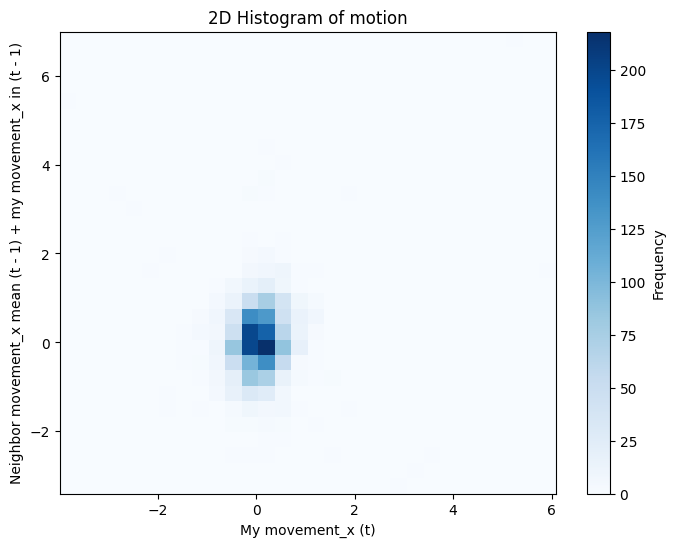

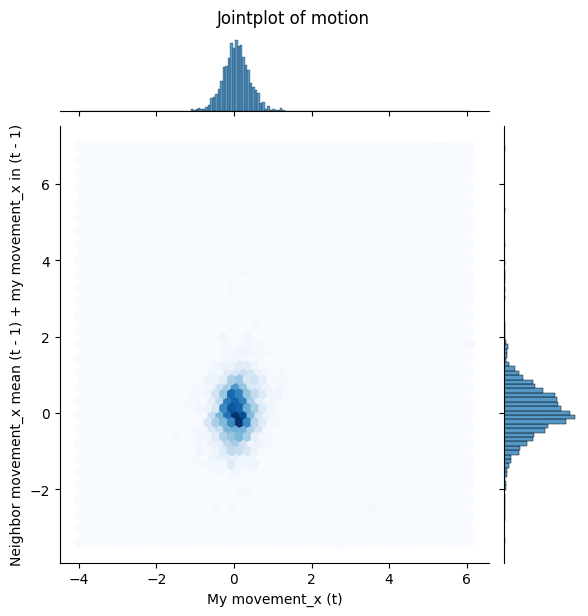

In [5]:
from scipy.spatial import Voronoi

df_WT = df[df['Image_Metadata_Site'] <= 4]
df_WT_Field = df_WT[(df_WT['Image_Metadata_Site'] == 1) & (df_WT['Exp_ID'] == 1)]

df_WT_Field = df_WT_Field.sort_values(by=['Image_Metadata_Site', 'track_id', 'Image_Metadata_T'])

# Group by 'track_id' to ensure differences are calculated only within each cell's track
df_WT_Field['movement_x'] = df_WT_Field.groupby('track_id')['objNuclei_Location_Center_X'].diff()
df_WT_Field['movement_y'] = df_WT_Field.groupby('track_id')['objNuclei_Location_Center_Y'].diff()

# Drop rows where differences are NaN (e.g., first row in each group)
df_WT_Field = df_WT_Field.dropna(subset=['movement_x', 'movement_y'])

df_WT_Field


ERKs = []
for i in range(1, 4):
    points = df_WT_Field[df_WT_Field['Image_Metadata_T'] == i][['objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y']].values
    vor = Voronoi(points)

    neighbors = {i: set() for i in range(1, len(points) + 1)}
    for p1, p2 in vor.ridge_points:
        neighbors[p1 + 1].add(p2 + 1)
        neighbors[p2 + 1].add(p1 + 1)

    for cell in range(1, len(points) + 1):
        my_erk = df_WT_Field[(df_WT_Field['Image_Metadata_T'] == i) & (df_WT_Field['track_id'] == cell)]['movement_x'].values
        if len(my_erk) == 0:
            continue

        neighbor_erk = []

        cell_erk_t_minus_1 = df_WT_Field[
            (df_WT_Field['Image_Metadata_T'] == i - 1) &
            (df_WT_Field['track_id'] == cell)
        ]['movement_x'].values


        for neighbor in neighbors[cell]:
            neighbor_erk_values = df_WT_Field[
                (df_WT_Field['Image_Metadata_T'] == i - 1) &
                (df_WT_Field['track_id'] == neighbor)
            ]['movement_x'].values

        if len(neighbor_erk_values) > 0:
            neighbor_erk.extend(neighbor_erk_values)

        if neighbor_erk:
            neighbor_erk_mean = np.mean(neighbor_erk)
        else:
            continue
        if len(cell_erk_t_minus_1) > 0:
                # add your value
                neighbor_erk_mean += cell_erk_t_minus_1[0]
        ERKs.append([my_erk[0], neighbor_erk_mean])

my_value = 'My movement_x (t)'
neighbor_value = 'Neighbor movement_x mean (t - 1) + my movement_x in (t - 1)'
df_ERK = pd.DataFrame(ERKs, columns=[my_value, neighbor_value])

df_ERK = df_ERK.dropna(subset=[my_value, neighbor_value])

# Plot using matplotlib (2D histogram)
plt.figure(figsize=(8, 6))
plt.hist2d(df_ERK[my_value], df_ERK[neighbor_value], bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel(my_value)
plt.ylabel(neighbor_value)
plt.title('2D Histogram of motion')
plt.show()

# Plot using seaborn (Jointplot)
sns.jointplot(x=my_value, y=neighbor_value, data=df_ERK, kind='hex', cmap='Blues')
plt.suptitle('Jointplot of motion', y=1.02)
plt.show()


In [ ]:
df_WT_Field = df_WT_Field.sort_values(by=['Image_Metadata_Site', 'track_id', 'Image_Metadata_T'])

# Group by 'track_id' to ensure differences are calculated only within each cell's track
df_WT_Field['movement_x'] = df_WT_Field.groupby('track_id')['objNuclei_Location_Center_X'].diff()
df_WT_Field['movement_y'] = df_WT_Field.groupby('track_id')['objNuclei_Location_Center_Y'].diff()

# Drop rows where differences are NaN (e.g., first row in each group)
df_WT_Field = df_WT_Field.dropna(subset=['movement_x', 'movement_y'])

df_WT_Field

,Exp_ID,Image_Metadata_Site,track_id,Image_Metadata_T,Nuclear_size,ERKKTR_ratio,FoxO3A_ratio,objNuclei_Location_Center_X,objNuclei_Location_Center_Y,movement_x,movement_y
2,1,1,1,2,314.000,1.059170,1.37627,932.376,873.787,0.226,-0.387
3,1,1,1,3,322.000,1.188000,1.35754,932.168,873.453,-0.208,-0.334
4,1,1,1,4,313.999,1.205540,1.36695,931.146,872.885,-1.022,-0.568
5,1,1,1,5,306.000,1.208040,1.37352,931.513,873.072,0.367,0.187
6,1,1,1,6,327.000,1.165190,1.39633,931.080,872.260,-0.433,-0.812
...,...,...,...,...,...,...,...,...,...,...,...
356627,1,1,2857,253,165.000,0.597341,1.32403,1019.050,771.624,-0.150,-1.191
356628,1,1,2857,254,192.000,0.587024,1.28853,1019.060,773.099,0.010,1.475
356629,1,1,2857,255,200.000,0.587822,1.28325,1019.100,773.540,0.040,0.441
356630,1,1,2857,256,192.000,0.579069,1.29542,1018.930,772.469,-0.170,-1.071


In [6]:
correlation = df_ERK[[my_value, neighbor_value]].corr(method='spearman')
correlation

,My movement_x (t),Neighbor movement_x mean (t - 1) + my movement_x in (t - 1)
My movement_x (t),1.000000,0.086296
Neighbor movement_x mean (t - 1) + my movement_x in (t - 1),0.086296,1.000000


### Fitting normal distribution

In [8]:
numpy_dataframe = df_ERK[[my_value, neighbor_value]].to_numpy()
mu = np.mean(numpy_dataframe, axis=0)
cov_matrix = np.cov(numpy_dataframe, rowvar=False)



## Sampling movement

(1401,)
(1401, 2)


ValueError: x and y must be the same size

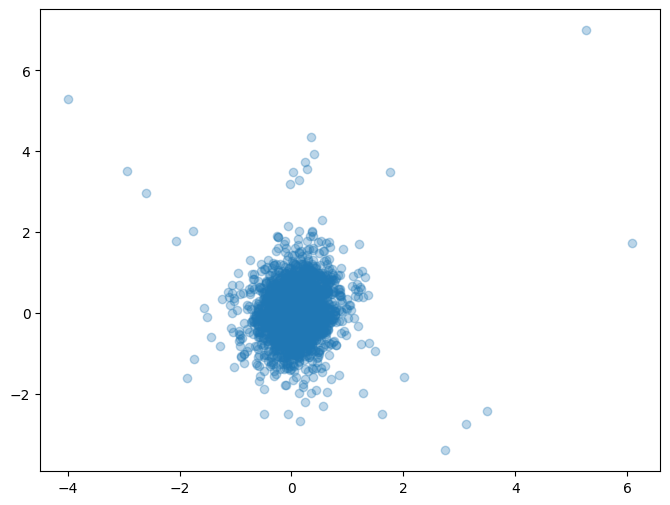

In [21]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
# Assume you have a DataFrame `df` with columns:
# - 'delta_erk_cell': Individual cell changes
# - 'delta_erk_neighbors': Average neighbor changes
# Example DataFrame (replace with your real data)

# Prepare data for KDE
X = df_ERK[[my_value, neighbor_value]].values
# Fit a 2D kernel density model
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)  # Adjust bandwidth as needed
kde.fit(X)
# Sampling function
def sample_erk_changes(neighbor_avg_changes, kde_model, n_samples=1):
    """
    Sample changes in ERK levels given neighbors' average changes.
    :param neighbor_avg_changes: List or array of neighbor changes for each cell.
    :param kde_model: Fitted kernel density estimation model.
    :param n_samples: Number of samples per cell.
    :return: Sampled ERK changes for each cell.
    """
    sampled_changes = []
    for neighbor_change in neighbor_avg_changes:
        # Generate points around the given neighbor change to sample from conditional distribution
        grid = np.column_stack((
            np.linspace(-3, 3, 100),  # Range of possible cell changes (adjust as needed)
            np.full(100, neighbor_change)
        ))
        # Calculate probabilities using the KDE model
        log_probs = kde_model.score_samples(grid)
        probs = np.exp(log_probs)
        # Normalize probabilities
        probs /= probs.sum()
        # Sample from the grid using probabilities
        sampled_change = np.random.choice(grid[:, 0], size=n_samples, p=probs)
        sampled_changes.append(sampled_change[0])  # Take the first sample (or more if needed)
    return np.array(sampled_changes)
# Example usage
current_neighbor_changes = df_WT_Field[df_WT_Field['Image_Metadata_T'] == 1]['movement_x'].values
print(current_neighbor_changes.shape)
#current_neighbor_changes = np.random.normal(0, 1, 900)  # Replace with real neighbor averages
#sampled_erk_changes = sample_erk_changes(current_neighbor_changes, kde_model=kde)

# multivariate with mu and cov_matrix
sampled_erk_changes = np.random.multivariate_normal(mu, cov_matrix, len(current_neighbor_changes))
print(sampled_erk_changes.shape)
# Plot the original data and sampled data
plt.figure(figsize=(8, 6))
plt.scatter(df_ERK[my_value], df_ERK[neighbor_value], alpha=0.3, label="Original Data")
plt.scatter(current_neighbor_changes, sampled_erk_changes, color='red', alpha=0.5, label="Sampled Changes")
plt.xlabel("Movement Neighbors")
plt.ylabel("Movement Cell")
plt.legend()
plt.title("KDE Sampling for ERK Changes")
plt.show()

In [ ]:
# For experiment 1, field of view 1, t = 0, compare real ERK values and sampled ERK values
from scipy.spatial import Voronoi
T = 2

df_WT = df[df['Image_Metadata_Site'] <= 4]
df_WT_Field = df_WT[(df_WT['Image_Metadata_Site'] == 1) & (df_WT['Exp_ID'] == 1)]
df_WT_Field = df_WT_Field.sort_values(by=['Image_Metadata_Site', 'track_id', 'Image_Metadata_T'])

# Group by 'track_id' to ensure differences are calculated only within each cell's track
df_WT_Field['movement_x'] = df_WT_Field.groupby('track_id')['objNuclei_Location_Center_X'].diff()
df_WT_Field['movement_y'] = df_WT_Field.groupby('track_id')['objNuclei_Location_Center_Y'].diff()

# Drop rows where differences are NaN (e.g., first row in each group)
df_WT_Field = df_WT_Field.dropna(subset=['movement_x', 'movement_y'])

df_WT_Field
ERK_real = df_WT_Field[df_WT_Field['Image_Metadata_T'] == T]['movement_x'].values

# Sample knowing neigbors and your own ERK in t = 1
points = df_WT_Field[df_WT_Field['Image_Metadata_T'] == T][['track_id','objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y']].values
vor = Voronoi(points[1:])

#eighbors = {i: set() for i in range(1, len(points) + 1)}
neighbors = {track_id: set() for track_id in points[:, 0]}
for p1, p2 in vor.ridge_points:
    neighbors[points[p1][0]].add(points[p2][0])
    neighbors[points[p2][0]].add(points[p1][0])

sampled_values = []
for cell in points[:, 0]:
    my_erk = df_WT_Field[(df_WT_Field['Image_Metadata_T'] == T - 1) & (df_WT_Field['track_id'] == cell)]['movement_x'].values
    if len(my_erk) == 0:
        sampled_values.append(None)
        continue
    else:
        my_erk = my_erk[0]

    neighbor_values = []
    for neighbor in neighbors[cell]:
      array_values = (df_WT_Field[(df_WT_Field['Image_Metadata_T'] == T - 1) & (df_WT_Field['track_id'] == neighbor)]['movement_x'].values)
      if len(array_values) > 0:
        neighbor_values.append(array_values[0])

    neighbor_values.append(my_erk)
    sampled_value = sample_erk_changes(neighbor_values, kde_model=kde)
    sampled_values.append(sampled_value[0])



In [ ]:
# # calculate MSE some values are None in sampled_values
sampled_values = np.where(sampled_values == None, np.nan, sampled_values).astype(float)

mask = ~np.isnan(sampled_values)

# Filter arrays
filtered_sampled_values = sampled_values[mask]
filtered_ERK_real = ERK_real[mask]

# Calculate MSE
mse = np.mean((filtered_sampled_values - filtered_ERK_real) ** 2)
print(filtered_sampled_values)
print(filtered_ERK_real)
print(f"Mean Squared Error (MSE): {mse}")
sampled_values

[ 0.33333333  0.33333333  0.03030303 ...  0.33333333 -1.12121212
 -0.45454545]
[ 0.226  0.115  0.527 ...  0.388 -0.319  0.616]
Mean Squared Error (MSE): 0.35471098459821115


array([ 0.33333333,  0.33333333,  0.03030303, ..., -0.45454545,
               nan,         nan])

In [ ]:
# for value in filtered_sampled_values:
#     print(value)
print(filtered_sampled_values.mean())

0.056926406926407


# Generating new data

## Learn distribution of ERK

## Alternative approaches

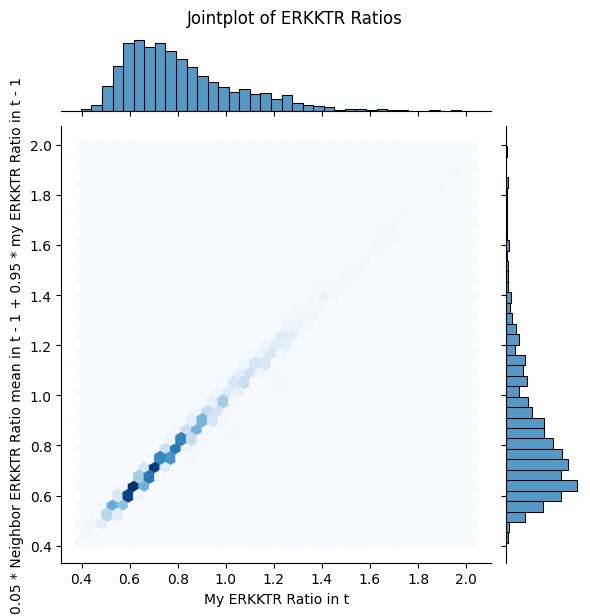

In [130]:
from scipy.spatial import Voronoi

df_WT = df[df['Image_Metadata_Site'] <= 4]
df_WT_Field = df_WT[(df_WT['Image_Metadata_Site'] == 1) & (df_WT['Exp_ID'] == 1)]

ERKs = []
for i in range(2, 4):
    points = df_WT_Field[df_WT_Field['Image_Metadata_T'] == i][['objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y']].values
    vor = Voronoi(points)

    neighbors = {i: set() for i in range(1, len(points) + 1)}
    for p1, p2 in vor.ridge_points:
        neighbors[p1 + 1].add(p2 + 1)
        neighbors[p2 + 1].add(p1 + 1)


    for cell in range(1, len(points) + 1):
        my_erk = df_WT_Field[(df_WT_Field['Image_Metadata_T'] == i) & (df_WT_Field['track_id'] == cell)]['ERKKTR_ratio'].values
        if len(my_erk) == 0:
            continue

        neighbor_erk = []

        cell_erk_t_minus_1 = df_WT_Field[
            (df_WT_Field['Image_Metadata_T'] == i - 1) &
            (df_WT_Field['track_id'] == cell)
        ]['ERKKTR_ratio'].values


        for neighbor in neighbors[cell]:
            neighbor_erk_values = df_WT_Field[
                (df_WT_Field['Image_Metadata_T'] == i - 1) &
                (df_WT_Field['track_id'] == neighbor)
            ]['ERKKTR_ratio'].values

        if len(neighbor_erk_values) > 0:
            neighbor_erk.extend(neighbor_erk_values)

        if neighbor_erk:
            neighbor_erk_mean = np.mean(neighbor_erk)
        else:
            continue
        if len(cell_erk_t_minus_1) > 0:
                # add your value
                neighbor_erk_mean = 0.05 * neighbor_erk_mean + 0.95 * cell_erk_t_minus_1[0]
        ERKs.append([my_erk[0], neighbor_erk_mean])

my_name = 'My ERKKTR Ratio in t'
neighbor_name = '0.05 * Neighbor ERKKTR Ratio mean in t - 1 + 0.95 * my ERKKTR Ratio in t - 1'

df_ERK = pd.DataFrame(ERKs, columns=[my_name, neighbor_name])

df_ERK = df_ERK.dropna(subset=[my_name, neighbor_name])


# Plot using seaborn (Jointplot)
sns.jointplot(x=my_name, y=neighbor_name, data=df_ERK, kind='hex', cmap='Blues')
plt.suptitle('Jointplot of ERKKTR Ratios', y=1.02)
plt.show()

# change names of columns to my_erk neighbor_erk
df_ERK.columns = ['my_erk', 'neighbor_erk']


## Current approach

In [ ]:
from scipy.spatial import Voronoi

df_WT = df[df['Image_Metadata_Site'] <= 4]
df_WT_Field = df_WT[(df_WT['Image_Metadata_Site'] == 1) & (df_WT['Exp_ID'] == 1)]

ERKs = []
for i in range(1, 4):
    points = df_WT_Field[df_WT_Field['Image_Metadata_T'] == i][['objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y']].values
    vor = Voronoi(points)

    neighbors = {i: set() for i in range(1, len(points) + 1)}
    for p1, p2 in vor.ridge_points:
        neighbors[p1 + 1].add(p2 + 1)
        neighbors[p2 + 1].add(p1 + 1)


    for cell in range(1, len(points) + 1):
        my_erk = df_WT_Field[(df_WT_Field['Image_Metadata_T'] == i) & (df_WT_Field['track_id'] == cell)]['ERKKTR_ratio'].values
        if len(my_erk) == 0:
            continue

        neighbor_erk = []

        cell_erk_t_minus_1 = df_WT_Field[
            (df_WT_Field['Image_Metadata_T'] == i - 1) &
            (df_WT_Field['track_id'] == cell)
        ]['ERKKTR_ratio'].values


        for neighbor in neighbors[cell]:
            neighbor_erk_values = df_WT_Field[
                (df_WT_Field['Image_Metadata_T'] == i - 1) &
                (df_WT_Field['track_id'] == neighbor)
            ]['ERKKTR_ratio'].values

        if len(neighbor_erk_values) > 0:
            neighbor_erk.extend(neighbor_erk_values)

        if neighbor_erk:
            neighbor_erk_mean = np.mean(neighbor_erk)
        else:
            continue
        if len(cell_erk_t_minus_1) > 0:
                # add your value
                neighbor_erk_mean += cell_erk_t_minus_1[0]
        ERKs.append([my_erk[0], neighbor_erk_mean])

df_ERK = pd.DataFrame(ERKs, columns=['My ERKKTR Ratio in t', 'Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1'])

df_ERK = df_ERK.dropna(subset=['My ERKKTR Ratio in t', 'Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1'])

# Plot using matplotlib (2D histogram)
plt.figure(figsize=(8, 6))
plt.hist2d(df_ERK['My ERKKTR Ratio in t'], df_ERK['Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1'], bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('My ERKKTR Ratio in t')
plt.ylabel('Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1')
plt.title('2D Histogram of ERKKTR Ratios')
plt.show()

# Plot using seaborn (Jointplot)
sns.jointplot(x='My ERKKTR Ratio in t', y='Neighbor ERKKTR Ratio mean in t - 1 + my ERKKTR Ratio in t - 1', data=df_ERK, kind='hex', cmap='Blues')
plt.suptitle('Jointplot of ERKKTR Ratios', y=1.02)
plt.show()





In [131]:
# check correlation between my_erk neighbor_erk
correlation = df_ERK[['my_erk', 'neighbor_erk']].corr(method='spearman')
correlation

,my_erk,neighbor_erk
my_erk,1.000000,0.992862
neighbor_erk,0.992862,1.000000


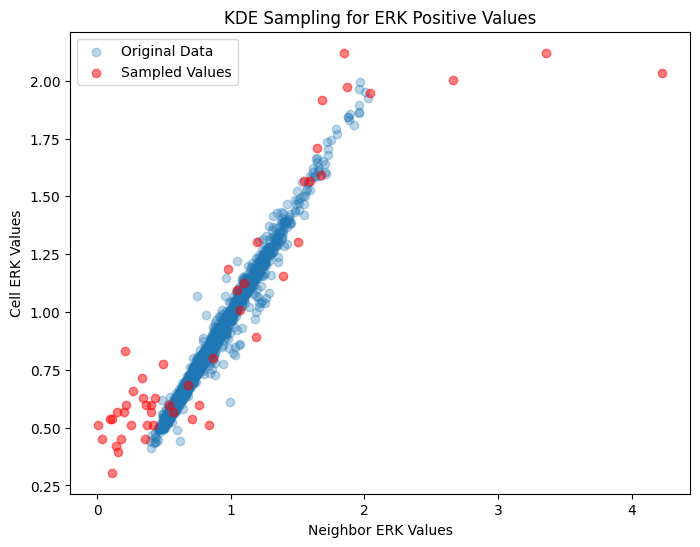

In [143]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt


# Prepare data for KDE
X = df_ERK[['my_erk', 'neighbor_erk']].values

# Fit a 2D kernel density model
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)  # Adjust bandwidth as needed
kde.fit(X)

# Sampling function
def sample_erk_values(neighbor_values, kde_model, n_samples=1):
    """
    Sample ERK values given neighbors' values.
    :param neighbor_values: List or array of neighbor values for each cell.
    :param kde_model: Fitted kernel density estimation model.
    :param n_samples: Number of samples per cell.
    :return: Sampled ERK values for each cell.
    """
    sampled_values = []
    for neighbor_value in neighbor_values:
        # Generate points around the given neighbor value to sample from the conditional distribution
        grid = np.column_stack((
            np.linspace(0.1, 3, 100),  # Range of possible cell values (adjust as needed, ensure > 0)
            np.full(100, neighbor_value)
        ))
        # Calculate probabilities using the KDE model
        log_probs = kde_model.score_samples(grid)
        probs = np.exp(log_probs)
        # Normalize probabilities
        probs /= probs.sum()
        # Sample from the grid using probabilities
        sampled_value = np.random.choice(grid[:, 0], size=n_samples, p=probs)
        sampled_values.append(sampled_value[0])  # Take the first sample (or more if needed)
    return np.array(sampled_values)

# Example usage
current_neighbor_values = np.random.exponential(scale=1.0, size=50)  # Replace with real neighbor values
sampled_erk_values = sample_erk_values(current_neighbor_values, kde_model=kde)

# Plot the original data and sampled data
plt.figure(figsize=(8, 6))
plt.scatter(df_ERK['my_erk'], df_ERK['neighbor_erk'], alpha=0.3, label="Original Data")
plt.scatter(current_neighbor_values, sampled_erk_values, color='red', alpha=0.5, label="Sampled Values")
plt.xlabel("Neighbor ERK Values")
plt.ylabel("Cell ERK Values")
plt.legend()
plt.title("KDE Sampling for ERK Positive Values")
plt.show()


In [141]:
sample_erk_values([1, 1, 1, 1], kde, n_samples=1)

array([0.86161616, 1.27171717, 0.83232323, 0.97878788])

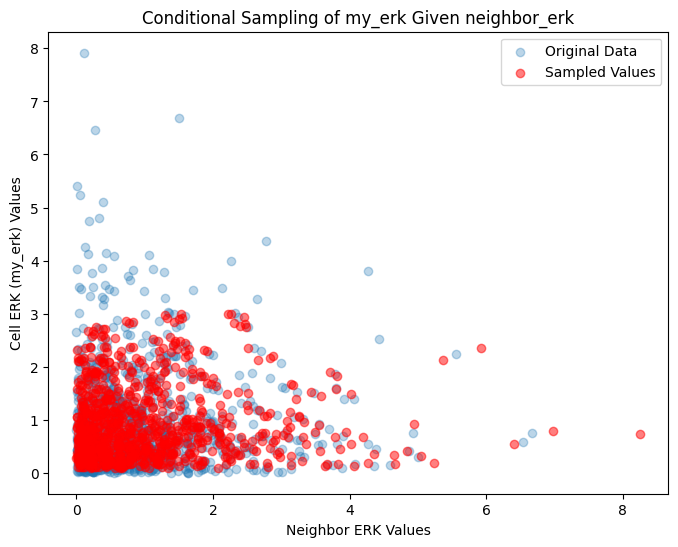

In [12]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Example DataFrame df_ERK
data = {
    'my_erk': np.random.exponential(scale=1.0, size=900),
    'neighbor_erk': np.random.exponential(scale=1.0, size=900)
}
df_ERK = pd.DataFrame(data)

# Prepare data for KDE
X = df_ERK[['my_erk', 'neighbor_erk']].values

# Fit a 2D kernel density model
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)  # Adjust bandwidth as needed
kde.fit(X)

# Conditional Sampling Function
def sample_erk_given_neighbor(neighbor_values, kde_model, n_samples=1, my_erk_range=(0.1, 3), resolution=200):
    """
    Sample 'my_erk' values conditionally given 'neighbor_erk' values.
    :param neighbor_values: List or array of neighbor_erk values.
    :param kde_model: Fitted kernel density estimation model.
    :param n_samples: Number of samples to generate per condition.
    :param my_erk_range: Range of 'my_erk' values to consider.
    :param resolution: Number of grid points for 'my_erk'.
    :return: Array of sampled 'my_erk' values.
    """
    sampled_values = []
    my_erk_grid = np.linspace(my_erk_range[0], my_erk_range[1], resolution)

    for neighbor_value in neighbor_values:
        # Create a grid of [my_erk, neighbor_value] pairs
        grid = np.column_stack((my_erk_grid, np.full(resolution, neighbor_value)))

        # Evaluate the KDE on this grid to get log probabilities
        log_probs = kde_model.score_samples(grid)
        probs = np.exp(log_probs)

        # Normalize probabilities to sum to 1
        probs /= probs.sum()

        # Sample 'my_erk' values from the grid based on the probabilities
        sampled_value = np.random.choice(my_erk_grid, size=n_samples, p=probs)
        sampled_values.append(sampled_value[0])  # Append the first sample

    return np.array(sampled_values)

# Example usage
current_neighbor_values = np.random.exponential(scale=1.0, size=900)  # Replace with real neighbor_erk values
sampled_my_erk_values = sample_erk_given_neighbor(current_neighbor_values, kde_model=kde)

# Plot the original data and sampled data
plt.figure(figsize=(8, 6))
plt.scatter(df_ERK['neighbor_erk'], df_ERK['my_erk'], alpha=0.3, label="Original Data")
plt.scatter(current_neighbor_values, sampled_my_erk_values, color='red', alpha=0.5, label="Sampled Values")
plt.xlabel("Neighbor ERK Values")
plt.ylabel("Cell ERK (my_erk) Values")
plt.legend()
plt.title("Conditional Sampling of my_erk Given neighbor_erk")
plt.show()


In [46]:
lst = []
for _ in range(1000):
    lst.append(sample_erk_given_neighbor([2.5], kde, n_samples=1)[0])

print(np.median(lst))
px.histogram(lst)

0.7557788944723618


In [49]:
# For experiment 1, field of view 1, t = 0, compare real ERK values and sampled ERK values
from scipy.spatial import Voronoi
T = 2
df_WT = df[df['Image_Metadata_Site'] <= 4]
df_WT_Field = df_WT[(df_WT['Image_Metadata_Site'] == 1) & (df_WT['Exp_ID'] == 1)]


ERK_real = df_WT_Field[df_WT_Field['Image_Metadata_T'] == T]['ERKKTR_ratio'].values

# Sample knowing neigbors and your own ERK in t = 1
points = df_WT_Field[df_WT_Field['Image_Metadata_T'] == T][['track_id','objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y']].values
vor = Voronoi(points[1:])
df_WT_Field_T_minus_1 = df_WT_Field[(df_WT_Field['Image_Metadata_T'] == T - 1)]

#eighbors = {i: set() for i in range(1, len(points) + 1)}
neighbors = {track_id: set() for track_id in points[:, 0]}
for p1, p2 in vor.ridge_points:
    neighbors[points[p1][0]].add(points[p2][0])
    neighbors[points[p2][0]].add(points[p1][0])

#sampled_value = sample_erk_values([1, 1, 1, 1, 1, 1], kde_model=kde)

sampled_values = []
for cell in points[:, 0]:
    my_erk = df_WT_Field_T_minus_1[(df_WT_Field_T_minus_1['track_id'] == cell)]['ERKKTR_ratio'].values
    if len(my_erk) == 0:
        sampled_values.append(None)
        continue
    else:
        my_erk = my_erk[0]

    neighbor_values = []
    for neighbor in neighbors[cell]:
      array_values = (df_WT_Field_T_minus_1[(df_WT_Field_T_minus_1['track_id'] == neighbor)]['ERKKTR_ratio'].values)
      if len(array_values) > 0:
        neighbor_values.append(array_values[0])

    neighbor_erk = my_erk + np.mean(neighbor_values)
    sampled_value = sample_erk_given_neighbor([neighbor_erk], kde_model=kde)
    sampled_values.append(sampled_value[0])



In [82]:
def generate_next_ERK(points, T):
    '''
    points must have values of columns ['track_id','objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y', 'ERKKTR_ratio']
    '''
    points_data_frame = points.copy()
    points = points.values
    vor = Voronoi(points[:, :3])
    neighbors = {track_id: set() for track_id in points[:, 0]}
    for p1, p2 in vor.ridge_points:
        neighbors[points[p1][0]].add(points[p2][0])
        neighbors[points[p2][0]].add(points[p1][0])


    sampled_values = []
    for cell in points[:, 0]:
        my_erk = points_data_frame[(points_data_frame['track_id'] == cell)]['ERKKTR_ratio'].values
        if len(my_erk) == 0:
            sampled_values.append(None)
            continue
        else:
            my_erk = my_erk[0]

        neighbor_values = []
        for neighbor in neighbors[cell]:
          array_values = (points_data_frame[(points_data_frame['track_id'] == neighbor)]['ERKKTR_ratio'].values)
          if len(array_values) > 0:
            neighbor_values.append(array_values[0])

        neighbor_erk = my_erk + np.mean(neighbor_values)
        sampled_value = sample_erk_given_neighbor([neighbor_erk], kde_model=kde)
        sampled_values.append((cell, sampled_value[0]))

    # create dataframe with columns track_id, ERKKTR_ratio, 'objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y' and Image_Metadata_T
    df_sampled_values = pd.DataFrame(sampled_values, columns=['track_id', 'ERKKTR_ratio'])
    points_data_frame_filtered = points_data_frame.drop(columns=['ERKKTR_ratio'], errors='ignore')
    df_sampled_values = df_sampled_values.merge(points_data_frame_filtered, on='track_id')

    df_sampled_values['Image_Metadata_T'] = T
    df_sampled_values['track_id'] = df_sampled_values['track_id'].astype(int)
    # change order to 'track_id', 'objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y', 'ERKKTR_ratio', 'Image_Metadata_T'
    df_sampled_values = df_sampled_values[['track_id', 'objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y', 'ERKKTR_ratio', 'Image_Metadata_T']]
    return df_sampled_values


In [83]:
points = df_WT_Field[df_WT_Field['Image_Metadata_T'] == 1][['track_id', 'objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y', 'ERKKTR_ratio', 'Image_Metadata_T']]

df_sampled_values = generate_next_ERK(points, 2)
df_sampled_values

,track_id,objNuclei_Location_Center_X,objNuclei_Location_Center_Y,ERKKTR_ratio,Image_Metadata_T
0,1,932.150,874.174,1.061809,2
1,2,161.732,365.453,0.886935,2
2,3,647.710,847.222,0.610050,2
3,4,642.852,828.110,0.886935,2
4,5,990.935,59.300,0.653769,2
...,...,...,...,...,...
1401,1615,641.592,484.663,0.216583,2
1402,1616,807.146,827.052,3.000000,2
1403,1617,706.268,888.305,2.227638,2
1404,1621,186.281,1019.990,0.172864,2


## Generate cells from first frame

In [87]:
def generate_video(df_first_frame, number_of_frames):
    result_data_frame = df_first_frame.copy()
    current_frame = df_first_frame.copy()

    for T in range(2, number_of_frames + 1):
        next_frame = generate_next_ERK(current_frame, T)
        result_data_frame = pd.concat([result_data_frame, next_frame])
        current_frame = next_frame

    # reset index
    result_data_frame = result_data_frame.reset_index(drop=True)
    return result_data_frame

In [94]:
df_first_frame = df_WT_Field[df_WT_Field['Image_Metadata_T'] == 1][['track_id', 'objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y', 'ERKKTR_ratio', 'Image_Metadata_T']]

simulation = generate_video(df_first_frame, 20)

In [112]:
# measure correlation between ERKKTR_ratio in Image_Metadata_T = 2 and = 3
ERK_2 = simulation[simulation['Image_Metadata_T'] == 2]['ERKKTR_ratio']
ERK_3 = simulation[simulation['Image_Metadata_T'] == 3]['ERKKTR_ratio']
ERK_2 = ERK_2.reset_index(drop=True)
ERK_3 = ERK_3.reset_index(drop=True)
print(ERK_2.corr(ERK_3))

-0.01759844592774107


In [114]:
ERK_2 = df_WT_Field[df_WT_Field['Image_Metadata_T'] == 2]['ERKKTR_ratio']
ERK_3 = df_WT_Field[df_WT_Field['Image_Metadata_T'] == 3]['ERKKTR_ratio']
ERK_2 = ERK_2.reset_index(drop=True)
ERK_3 = ERK_3.reset_index(drop=True)
print(ERK_2)
print(ERK_3)
print(ERK_2.corr(ERK_3))

0       1.059170
1       1.233590
2       0.748137
3       0.827175
4       1.557310
          ...   
1406    0.471701
1407    0.736323
1408    1.016760
1409    0.933792
1410    0.673443
Name: ERKKTR_ratio, Length: 1411, dtype: float64
0       1.188000
1       1.234480
2       0.791350
3       0.813935
4       1.548040
          ...   
1403    0.730656
1404    1.046000
1405    1.044230
1406    0.801877
1407    0.972903
Name: ERKKTR_ratio, Length: 1408, dtype: float64
0.9326644050506163


## Visualize data

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import imageio.v2 as imageio
import os

# Variables

marker = 'ERKKTR_ratio'

# Compute min and max values for color scale
min_value = np.log(simulation[marker].min())
max_value = np.log(simulation[marker].max())

# Temporary directory for saving frames
os.makedirs("temp_frames", exist_ok=True)
frames = []

for t in range(1, 21):

    current_frame = simulation[simulation['Image_Metadata_T'] == t]

    # Create figure
    plt.figure(figsize=(8, 6))

    sc = plt.scatter(
        current_frame['objNuclei_Location_Center_X'],
        current_frame['objNuclei_Location_Center_Y'],
        s=16,
        c=np.log(current_frame[marker]),
        cmap='RdYlGn',
        vmin=min_value,
        vmax=max_value
    )

    plt.xlabel('Center X')
    plt.ylabel('Center Y')
    plt.title(f'Simulating Movement Time: {t}')
    plt.grid(True)

    cbar = plt.colorbar(sc, label=f'Intensity ({marker})')

    # Save frame
    filename = f"temp_frames/frame_{t:03d}.png"
    plt.savefig(filename)
    frames.append(filename)
    plt.close()  # Close the figure to save memory

# Create GIF
with imageio.get_writer("simulation.gif", mode='I', duration=1) as writer:
    for frame in frames:
        image = imageio.imread(frame)
        writer.append_data(image)

# Cleanup
for frame in frames:
    os.remove(frame)
os.rmdir("temp_frames")

print("GIF saved as 'simulation.gif'")

GIF saved as 'simulation.gif'
